# Global Feature Effect

In [1]:
import numpy as np
import effector

## Generate a toy dataset

In [2]:
def generate_dataset(N, x1_min, x1_max, x2_sigma, x3_sigma):
    x1 = np.concatenate((np.array([x1_min]),
                         np.random.uniform(x1_min, x1_max, size=int(N - 2)),
                         np.array([x1_max])))
    x2 = np.random.normal(loc=x1, scale=x2_sigma)
    x3 = np.random.normal(loc=np.zeros_like(x1), scale=x3_sigma)
    return np.stack((x1, x2, x3), axis=-1)


In [3]:
np.random.seed(21)

N = 1000
x1_min = 0
x1_max = 1
x2_sigma = .01
x3_sigma = 1.

X = generate_dataset(N, x1_min, x1_max, x2_sigma, x3_sigma)

## Define the model

In [4]:
def predict(x):
    y = 7*x[:, 0] - 3*x[:, 1] + 4*x[:, 2]
    return y

def predict_grad(x):
    df_dx1 = 7 * np.ones([x.shape[0]])
    df_dx2 = -3 * np.ones([x.shape[0]])
    df_dx3 = 4 * np.ones([x.shape[0]])
    return np.stack([df_dx1, df_dx2, df_dx3], axis=-1)

## Feature effect plot

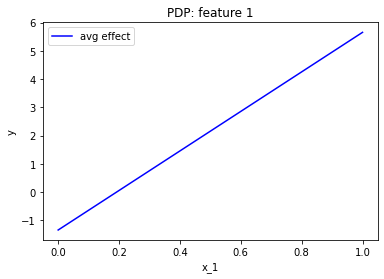

In [5]:
effector.PDP(data=X, model=predict).plot(feature=0)

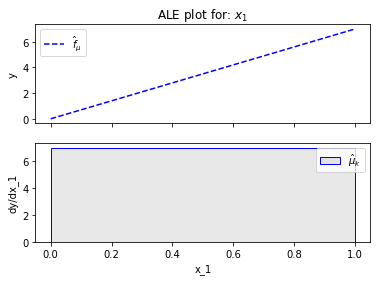

In [6]:
effector.RHALE(data=X, model=predict, model_jac=predict_grad).plot(feature=0)

### Let's take a step inside